In [1]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("Tripadvisor.xlsx")

In [5]:
df.head()

,Name,Date of review,Subject,Review,Rating,Date of Stay
0,Aaquib,1 Aug,aaquib,i had my stay in radisson blu plaza airport. h...,5,August 2021
1,Saurabh,1 Aug,Saurabh,"Amazing stay, had breakfast at NYC and food wa...",5,August 2021
2,Mahesh,1 Aug,Amazing stay fabulous food and service,It was a great experience especially the food ...,5,August 2021
3,Nambi,1 Aug,Rajesh Nambiar,Had dinner at the NYC restuarant today. It was...,5,August 2021
4,Richa,1 Aug,It was a wonderful stay here.,I was staying here for a couple of days.. it w...,5,August 2021


In [6]:
df['Rating'].value_counts()

5    5432
4     933
3     228
2     109
1      98
Name: Rating, dtype: int64

Text(0, 0.5, 'Counts')

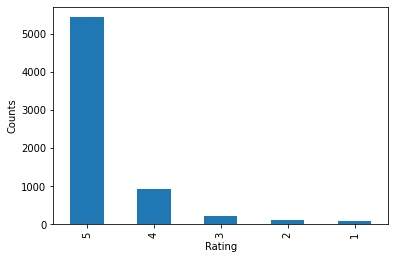

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df["Rating"].value_counts().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Counts")

In [21]:
def process_df(df):
    """
    Filters the dataframe and creates dataframe which contains 
    the fields [reviews.text, reviews.rating, sentiment]
    Rating below 3 and above 3 are taken as negative and positive respectively
    """
    df1 = df[['Review','Rating']]
    df1_filtered = df1    
    sentiment_dict = {1:0, 2:0, 3:0, 4:1, 5:1}    
    df1_filtered['sentiment'] = df1_filtered['Rating'].map(sentiment_dict)
    return df1_filtered

In [22]:
df1 = process_df(df)

In [23]:
df1.head()

,Review,Rating,sentiment
0,i had my stay in radisson blu plaza airport. h...,5,1
1,"Amazing stay, had breakfast at NYC and food wa...",5,1
2,It was a great experience especially the food ...,5,1
3,Had dinner at the NYC restuarant today. It was...,5,1
4,I was staying here for a couple of days.. it w...,5,1


In [24]:
df1.shape

(6800, 3)

### Find the count of reviews in each sentiment category

In [25]:
df1.groupby(df1['sentiment']).count()

,Review,Rating
sentiment,,
0,435,435
1,6365,6365


### Data is imbalanced so load and add more data in negative reivew category

In [26]:
df = pd.read_excel("Tripadvisor.xlsx")

In [27]:
df2 = process_df(df)

In [28]:
df2.head()

,Review,Rating,sentiment
0,i had my stay in radisson blu plaza airport. h...,5,1
1,"Amazing stay, had breakfast at NYC and food wa...",5,1
2,It was a great experience especially the food ...,5,1
3,Had dinner at the NYC restuarant today. It was...,5,1
4,I was staying here for a couple of days.. it w...,5,1


In [29]:
df2.groupby(df2['sentiment']).count()

,Review,Rating
sentiment,,
0,435,435
1,6365,6365


In [30]:
data_set = df1

In [31]:
data_set.count()

Review       6800
Rating       6800
sentiment    6800
dtype: int64

In [32]:
data_set = data_set.rename(columns={'Review':'content','Rating':'rating'})

In [33]:
data_set.count()

content      6800
rating       6800
sentiment    6800
dtype: int64

In [34]:
data_set.groupby(data_set['sentiment']).count()

,content,rating
sentiment,,
0,435,435
1,6365,6365


In [35]:
data_set.head()

,content,rating,sentiment
0,i had my stay in radisson blu plaza airport. h...,5,1
1,"Amazing stay, had breakfast at NYC and food wa...",5,1
2,It was a great experience especially the food ...,5,1
3,Had dinner at the NYC restuarant today. It was...,5,1
4,I was staying here for a couple of days.. it w...,5,1


In [37]:
data_set.shape

(6800, 3)

In [38]:
data_set.groupby(data_set['sentiment']).count()

,content,rating
sentiment,,
0,435,435
1,6365,6365


In [39]:
# save the dataset
with open('data_set.pickle', 'wb') as data:
    pickle.dump(data_set, data)